<a href="https://colab.research.google.com/github/devandrepascoa/Colab_Notebooks/blob/master/MNIST_PCA_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import tensorflow.keras as keras
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
import numpy as np
import math
from scipy.linalg import eigh

#Extracting our data from the keras datasets library
(x_train, y_train), (x_test, y_test) = mnist.load_data()
M = x_train.shape[0]#Number of training examples
x_train = x_train.reshape((x_train.shape[0],-1))
print(x_train.shape)
#Normalizing the data so our features are scaled to the same proportion
#Features are every variable (784 variables), we could also divide by 255.0
standardized_data = StandardScaler().fit_transform(x_train)
print(standardized_data.shape)

(60000, 784)
(60000, 784)


In [254]:
#Calculating  the covariance matrix with data.T*data
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T,sample_data)
print(covar_matrix.shape)

(784, 784)


In [255]:
 #Creating eigen vectors and eigen values of the covariance matrix
values, vectors = eigh(covar_matrix)
vectors = vectors.T 
#Selecting the eigen vectors with highest variation
#Variation is directly proporcional to the eigen values
#So we can select the vectors with 3 highest eigen values
pca_1 = vectors[783]
pca_2 = vectors[782]
pca_3 = vectors[781]
#Cálculo das percentagens de variancia dos componentes principais
variance_1 = values[783]/(M-1)
variance_2 = values[782]/(M-1)
variance_3 = values[781]/(M-1)
total_variance = variance_1+variance_2+variance_3 #Variancia total
perc_var1 = math.ceil((variance_1/total_variance)*100.0*100)/100
perc_var2 = math.ceil((variance_2/total_variance)*100.0*100)/100
perc_var3 = math.ceil((variance_3/total_variance)*100.0*100)/100

vectors = np.array([pca_1,pca_2,pca_3])
print(vectors.shape)

(3, 784)


In [0]:
import matplotlib.pyplot as plt
#Projection of the data into the eigen vectors
new_coordinates = np.matmul(vectors, standardized_data.T)

In [257]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates, y_train)).T
df = pd.DataFrame(data=new_coordinates, columns=("1st_principal","2nd_principal","3rd_principal",  "label"))
print(df.head())

   1st_principal  2nd_principal  3rd_principal  label
0      -0.922159      -4.814790      -0.067560    5.0
1       8.708977      -7.754403       3.447910    0.0
2       2.328389       9.431338       6.184114    4.0
3      -6.582173      -3.746318      -3.690851    1.0
4      -5.183251       3.133297       6.277947    9.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


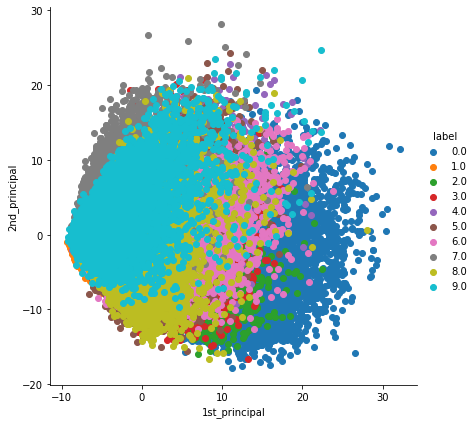

In [258]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(df, hue="label", size=6).map(plt.scatter,  "1st_principal","2nd_principal").add_legend()
plt.show()

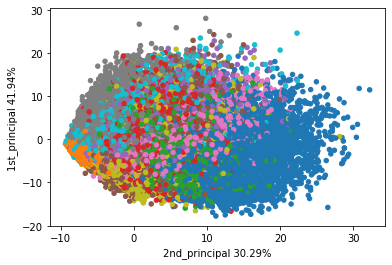

In [259]:
#plotting 2d data points with matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['1st_principal'],df['2nd_principal'],  c=df['label'],s=20,cmap="tab10")
ax.set_xlabel("2nd_principal "+str(perc_var2)+"%")
ax.set_ylabel("1st_principal "+str(perc_var1)+"%")

plt.show()

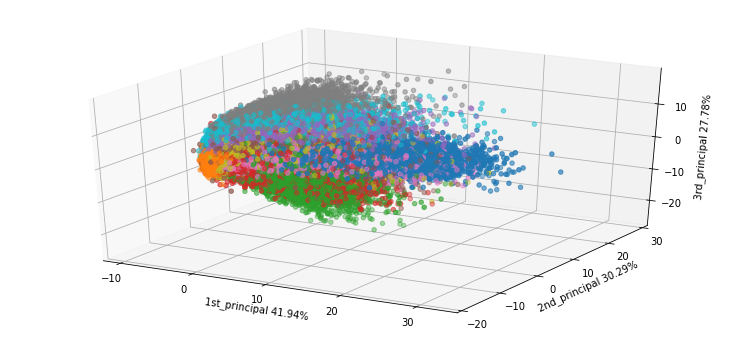

In [261]:
#plotting 3d data points with matplotlib
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(df['1st_principal'], df['2nd_principal'], df['3rd_principal'], c=df['label'],cmap="tab10", s=20)
ax.set_xlabel("1st_principal "+str(perc_var1)+"%")
ax.set_ylabel("2nd_principal "+str(perc_var2)+"%")
ax.set_zlabel("3rd_principal "+str(perc_var3)+"%")

plt.show()
